In [5]:
from graph_tool.all import *


In [ ]:
file_name = "1day20150822_0.95conf_160dist_3ilen.graphml"

In [9]:
G = gt.load_graph(file_name)

In [10]:
G

<Graph object, undirected, with 2461 vertices and 325975 edges at 0x7f1be7c8bf28>

In [23]:
G.list_properties()

_graphml_vertex_id (vertex)  (type: string)
_graphml_edge_id (edge)    (type: string)
weight         (edge)    (type: int64_t)


In [98]:
G.clear_filters()

In [99]:
ep = G.new_edge_property('bool')
w = G.edge_properties.weight.a
th = 10

for e, edge in enumerate(G.edges()):
    if (w[e] > th):
        ep[edge]=True
    else:
        ep[edge]=False


In [100]:
G.set_edge_filter(ep)

In [101]:
print(G)

<Graph object, undirected, with 2461 vertices and 3870 edges, edges filtered by (<PropertyMap object with key type 'Edge' and value type 'bool', for Graph 0x7f1be7c8bf28, at 0x7f1be7c0bba8>, False), vertices filtered by (<PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7f1be7c8bf28, at 0x7f1be7c0b940>, False) at 0x7f1be7c8bf28>


In [103]:
G.purge_edges()

In [ ]:
vp = G.new_vertex_property('bool')
deg = G.degree_property_map(deg='total').a

In [120]:
G.vertices()

In [121]:
for v, vertex in enumerate(G.vertices()):
    if (deg[v] > 0):
        vp[vertex]=True
    else:
        vp[vertex]=False

In [122]:
G.set_vertex_filter(vp)

In [124]:
G.purge_vertices()

In [125]:
print(G)

<Graph object, undirected, with 978 vertices and 3870 edges, edges filtered by (<PropertyMap object with key type 'Edge' and value type 'bool', for Graph 0x7f1be7c8bf28, at 0x7f1be7235748>, False), vertices filtered by (<PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7f1be7c8bf28, at 0x7f1be7c00048>, False) at 0x7f1be7c8bf28>


In [126]:
state = gt.minimize_blockmodel_dl(G, deg_corr=False)

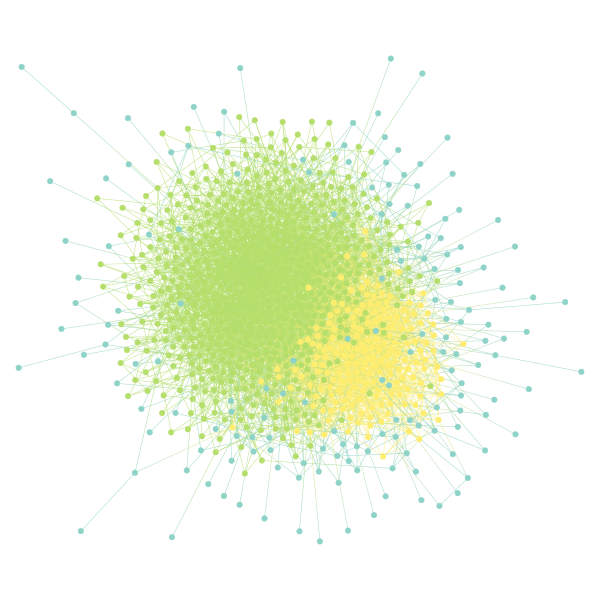

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1be7c8bf28, at 0x7f1be72a74e0>

In [127]:
state.draw()

In [128]:
b = state.get_blocks()

In [129]:
b

<PropertyMap object with key type 'Vertex' and value type 'int32_t', for Graph 0x7f1be7c8bf28, at 0x7f1be7243f60>

In [137]:
from collections import Counter

In [138]:
Counter(b)

Counter({0: 161, 1: 640, 2: 177})